In [3]:
%pip install gradio

^C
Note: you may need to restart the kernel to use updated packages.


In [26]:
from fastai.vision.all import *
import gradio as gr

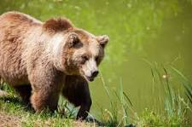

In [36]:
im = PILImage.create('c://osos/test/2.jfif')
im.thumbnail((192,192))
im

In [37]:
learn = load_learner('/osos/model/osos_model.pkl')

In [38]:
learn.predict(im)

('Brown Bear',
 tensor(2),
 tensor([1.0154e-04, 5.1035e-05, 9.9828e-01, 8.9573e-04, 8.3648e-05, 3.7852e-04,
         2.3910e-05, 1.4172e-04, 3.9093e-05]))

In [39]:
categories = [
    "Andean Bear or Spectacled Bear",
    "Asiatic Black Bear",
    "Brown Bear",
    "Giant Panda",
    "North American Black Bear",
    "Polar Bear",
    "Sloth Bear",
    "Sun Bear",
    "Teddy"
]

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [59]:
classify_image(im)

{'Andean Bear or Spectacled Bear': 0.00010153677430935204,
 'Asiatic Black Bear': 5.1035498472629115e-05,
 'Brown Bear': 0.998284637928009,
 'Giant Panda': 0.000895727367606014,
 'North American Black Bear': 8.364797395188361e-05,
 'Polar Bear': 0.000378523429390043,
 'Sloth Bear': 2.3909502488095313e-05,
 'Sun Bear': 0.00014171606744639575,
 'Teddy': 3.909263978130184e-05}

In [65]:
import gradio as gr

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

demo = gr.Interface(fn=classify_image, inputs="image", outputs="label")
demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
